# Xente Fraud Detection Challenge
<h2 style='bold'>Background:</h2>
<p style='font-size:20'>
Fraud detection is an important application of machine learning in the financial services sector. This solution will help Xente provide improved and safer service to its customers.The objective of this competition is to create a machine learning model to detect fraudulent transactions.
</p>

In [2]:
## Exploratory Data Analysis

In [3]:
'''Importing necessary libraries'''
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
#importing the data
path = "C:/Users/Silent/Desktop/Data Science Projects/Running/Xente"
train = pd.read_csv("C:/Users/Silent/Desktop/Data Science Projects/Running/Xente/training.csv")
test = pd.read_csv("C:/Users/Silent/Desktop/Data Science Projects/Running/Xente/test.csv")
sub = pd.read_csv("C:/Users/Silent/Desktop/Data Science Projects/Running/Xente/test.csv")


In [7]:
#train set info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


In [8]:
#viewing a sample of the training data
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [9]:
#test set info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45019 entries, 0 to 45018
Data columns (total 15 columns):
TransactionId           45019 non-null object
BatchId                 45019 non-null object
AccountId               45019 non-null object
SubscriptionId          45019 non-null object
CustomerId              45019 non-null object
CurrencyCode            45019 non-null object
CountryCode             45019 non-null int64
ProviderId              45019 non-null object
ProductId               45019 non-null object
ProductCategory         45019 non-null object
ChannelId               45019 non-null object
Amount                  45019 non-null float64
Value                   45019 non-null int64
TransactionStartTime    45019 non-null object
PricingStrategy         45019 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 5.2+ MB


In [10]:
#previewing the test set
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [11]:
#checking the shape of the train and test datasets
tr = train.shape
te = test.shape
print("train_set_shape is: {} and test_set_shape is: {}".format(tr,te))

train_set_shape is: (95662, 16) and test_set_shape is: (45019, 15)


In [12]:
train.drop_duplicates(keep="first", inplace=True) #removing duplicate data if any
test.drop_duplicates(keep="first", inplace=True)

del tr
del te

In [13]:
#Count of fraudulent and non-fraudulent cases
print("Fraudulent: {}".format((train["FraudResult"]==1).sum()))
print("Non-Fraudulent: {}".format((train["FraudResult"]==0).sum()))

Fraudulent: 193
Non-Fraudulent: 95469


Text(0.5, 1.0, 'Fraudulent VS Non-Fraudulent')

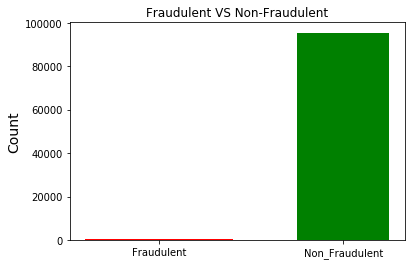

In [14]:
#Visualising Fraudulent and non-fraudulent cases
plt.bar("Fraudulent", train["FraudResult"].value_counts()[1], color="red")
plt.bar("Non_Fraudulent", train["FraudResult"].value_counts()[0], width=0.5, color="green")
plt.ylabel("Count", fontsize=14)
plt.title("Fraudulent VS Non-Fraudulent")

In [15]:
#label encoding columns
columns = train.columns.tolist()[1:11]
test_columns = test.columns.tolist()[1:11]

le = LabelEncoder()
for each in columns:
    train[each] = le.fit_transform(train[each])

for column in test_columns:
  test[column] = le.fit_transform(test[column])

In [16]:
train.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,46980,2490,3535,2584,0,0,5,1,0,2,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,31755,3219,2366,2584,0,0,3,19,2,1,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,60272,2713,996,2806,0,0,5,0,0,2,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,1797,3351,974,3733,0,0,0,11,8,2,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,48941,3219,2366,3733,0,0,3,19,2,1,-644.0,644,2018-11-15T03:34:21Z,2,0


In [17]:
len_train = len(train)
new_df = pd.concat([train, test], sort=False)

#getting categorical dummies
categorical_columns = ["ProviderId", "ProductCategory", "ProductId", "ChannelId"]
new_df = pd.get_dummies(new_df, columns=categorical_columns)
new_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductId_21,ProductId_22,ProductId_23,ProductId_24,ProductId_25,ChannelId_0,ChannelId_1,ChannelId_2,ChannelId_3,ChannelId_4
0,TransactionId_76871,46980,2490,3535,2584,0,0,1000.0,1000,2018-11-15T02:18:49Z,...,0,0,0,0,0,0,0,1,0,0
1,TransactionId_73770,31755,3219,2366,2584,0,0,-20.0,20,2018-11-15T02:19:08Z,...,0,0,0,0,0,0,1,0,0,0
2,TransactionId_26203,60272,2713,996,2806,0,0,500.0,500,2018-11-15T02:44:21Z,...,0,0,0,0,0,0,0,1,0,0
3,TransactionId_380,1797,3351,974,3733,0,0,20000.0,21800,2018-11-15T03:32:55Z,...,0,0,0,0,0,0,0,1,0,0
4,TransactionId_28195,48941,3219,2366,3733,0,0,-644.0,644,2018-11-15T03:34:21Z,...,0,0,0,0,0,0,1,0,0,0


## Feature engineering(1)

In [18]:
#new_df

In [19]:
train = new_df[:len_train]
test = new_df[len_train:].reset_index(drop=True)

In [20]:
test.drop("FraudResult", axis=1, inplace=True)

In [21]:
#Extracting time and day from the TransactionStartTime column to create new features
train['hour'] = pd.to_datetime(train.TransactionStartTime).dt.hour
train['minute'] = pd.to_datetime(train.TransactionStartTime).dt.minute
train['day'] = pd.to_datetime(train.TransactionStartTime).dt.dayofweek

test['hour'] = pd.to_datetime(test.TransactionStartTime).dt.hour
test['minute'] = pd.to_datetime(test.TransactionStartTime).dt.minute
test['day'] = pd.to_datetime(test.TransactionStartTime).dt.dayofweek

C:\Users\Silent\Anaconda3\Conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Silent\Anaconda3\Conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Silent\Anaconda3\Conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [22]:
# dropping the transaction starttime column
train = train.drop(["TransactionStartTime"], axis=1)
test = test.drop(["TransactionStartTime"], axis=1)

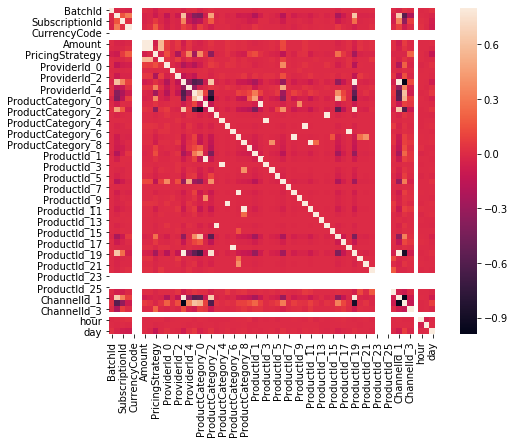

In [23]:
correlations = train.corr()
fig = plt.figure(figsize = (9, 6))

sns.heatmap(correlations, vmax = .8, square = True)
plt.show()

Text(0.5, 1.0, 'correlation bar_hist')

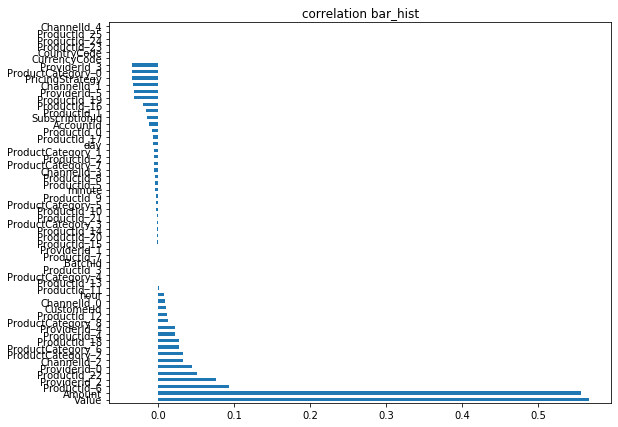

In [24]:
# Visualizing correlations of the various features to fraud_result
(correlations
     .FraudResult
     .drop("FraudResult") # can't compare the variable under study to itself
     .sort_values(ascending=False)
     .plot
     .barh(figsize=(9,7)))
plt.title("correlation bar_hist")

## Feature Engineering

In [25]:
train["period"] = np.nan
test["period"] = np.nan

In [26]:
train.loc[train.hour < 7, "period"] = 'em'
train.loc[(train.hour >= 7) & (train.hour < 11), "period"] = 'am'
train.loc[(train.hour >= 11) & (train.hour < 15), "period"] = 'mid'
train.loc[(train.hour >= 15) & (train.hour < 19), "period"] = 'eve'
train.loc[(train.hour >= 19) & (train.hour <= 24), "period"] = 'pm'

test.loc[test.hour < 7, "period"] = 'em'
test.loc[(test.hour >= 7) & (test.hour < 11), "period"] = 'am'
test.loc[(test.hour >= 11) & (test.hour < 15), "period"] = 'mid'
test.loc[(test.hour >= 15) & (test.hour < 19), "period"] = 'eve'
test.loc[(test.hour >= 19) & (test.hour <= 24), "period"] = 'pm'

In [27]:
# Encoding the period feature columns
le = LabelEncoder()
train["period"] = le.fit_transform(train["period"])
test["period"] = le.fit_transform(test["period"])

In [28]:
# Dropping columns with negative correlation to the fraudresult
columns_to_drop = ["SubscriptionId"]

train = train.drop(columns_to_drop, axis=1)
test = test.drop(columns_to_drop, axis=1)

Text(0.5, 1.0, 'correlation bar_hist')

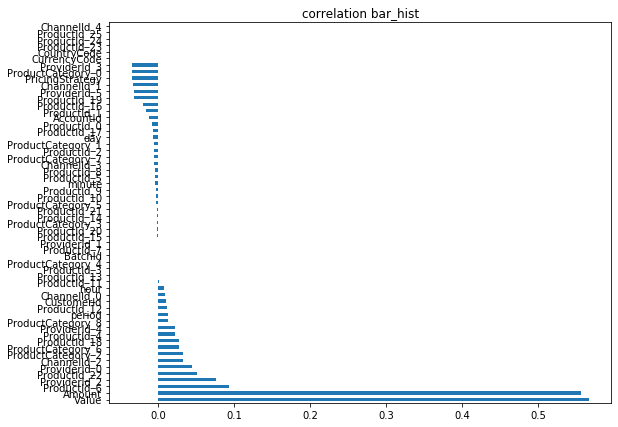

In [29]:
new_correlations = train.corr()

# Visualizing correlations of new features to fraud_result
(new_correlations
     .FraudResult
     .drop("FraudResult") # can't compare the variable under study to itself
     .sort_values(ascending=False)
     .plot
     .barh(figsize=(9,7)))
plt.title("correlation bar_hist")

In [30]:
# dropping non-predictor feature columns and the target(train-set only)
target = train["FraudResult"]
train = train.drop(["TransactionId", "FraudResult"], axis=1)
test_id = test["TransactionId"]
test = test.drop(["TransactionId"], axis=1)

In [31]:
#Normalizing Amount and value columns
train["Value"] = train["Value"].abs()
train["Amount"] = train["Amount"].abs()
test["Value"] = test["Value"].abs()
test["Amount"] = test["Amount"].abs()

In [32]:
columns = columns
X = train
y = target

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25,
                                                  random_state=1)

#boxcox transform of value col.
X_train.loc[:,'Value'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Value'],
                                                                   alpha=0.01)

C:\Users\Silent\Anaconda3\Conda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [33]:
MCC_scorer = make_scorer(matthews_corrcoef)

In [34]:
# RandomForest
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(max_depth=9, n_jobs=-1, random_state=1))
])
param_grid_rf = {'model__n_estimators': [50, 75, 100, 150, 200, 250, 300]
                 }

grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf,
                       scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs',
                       cv=8, verbose=1, return_train_score=False)

grid_rf.fit(X_train, y_train)

Fitting 8 folds for each of 7 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed: 14.7min finished


GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=9,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                       

In [ ]:
# Xgboost
model = xgb.XGBClassifier()

max_depth = range(1, 11, 2)
random_state=[1]
subsample = [0.9]
base_score = [0.5]
n_estimators = [50, 100, 150, 200, 250]

param_grid = dict(max_depth=max_depth, n_estimators=n_estimators,
                  random_state=random_state, subsample=subsample,
                  base_score=base_score)
kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=1)

grid_xgb = GridSearchCV(model, param_grid, scoring=MCC_scorer, n_jobs=-1, 
                        pre_dispatch='2*n_jobs', cv=kfold, verbose=1)

grid_xgb.fit(X_train, y_train)

In [ ]:
print("RandomForest: \n")
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print("\n")
print("Xgboost: \n")
print(grid_xgb.best_score_)
print(grid_xgb.best_params_)6

In [ ]:
y_pred = grid_rf.predict(X_val)
print(f'f1_score: {f1_score(y_val, y_pred)}\n')
print(confusion_matrix(y_val, y_pred))
print("\n")

val_pred = grid_xgb.predict(X_val)
print(f'f1_score: {f1_score(y_val, val_pred)}\n')
confusion_matrix(y_val, val_pred)

In [ ]:
print("Predicting...")
predictions = grid_xgb.predict(test)
submission = pd.DataFrame({'TransactionId': test_id, 'FraudResult': predictions})
(submission['FraudResult']==1).value_counts()

In [ ]:
#making a submission file
submission.to_csv('sub.csv',index=False) #currently waiting to test this submission
print("done...")

In [ ]:
#LBscore 0.76363 currently with xgboost. (only dropping "SubscriptionId"/no new features)